# ALGORITMO GENÉTICO PARA OTIMIZAR ROTEAMENTO DE VEÍCULOS DE ENTREGA

### TODOS OS DADOS SÃO FICTÍCIOS. O INTUITO É APENAS MOSTRAR A APLICABILIDADE DOS ALGORITMOS GENÉTICOS.

Restrições:

- Cada cliente deve ser atendido exatamente uma vez.
    
- A soma das demandas dos clientes em qualquer rota não pode exceder a capacidade do veículo.

In [1074]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [1075]:
# Tabela de demandas dos clientes
demandas_data = {
    'Cliente': list(range(0, 16)),
    'Demanda (unidades)': [0, 15, 20, 25, 10, 15, 25, 15, 20, 10, 25, 10, 20, 15, 10, 20]
}
demandas = pd.DataFrame(demandas_data)

# Exibir a tabela de demandas
print("Tabela de Demandas:")
display(demandas)

# Matriz de distâncias
distances_data = [
    [0, 10, 20, 30, 25, 35, 40, 50, 45, 55, 60, 65, 70, 75, 80, 85],
    [10, 0, 15, 25, 20, 30, 35, 45, 40, 50, 55, 60, 65, 70, 75, 80],
    [20, 15, 0, 10, 5, 15, 20, 30, 25, 35, 40, 45, 50, 55, 60, 65],
    [30, 25, 10, 0, 10, 5, 15, 25, 20, 30, 35, 40, 45, 50, 55, 60],
    [25, 20, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35, 40, 45, 50],
    [35, 30, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35, 40, 45],
    [40, 35, 20, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35, 40],
    [50, 45, 30, 25, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30, 35],
    [45, 40, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25, 30],
    [55, 50, 35, 30, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10, 20, 25],
    [60, 55, 40, 35, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10, 20],
    [65, 60, 45, 40, 30, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15, 10],
    [70, 65, 50, 45, 35, 30, 25, 20, 10, 15, 5, 10, 0, 10, 5, 15],
    [75, 70, 55, 50, 40, 35, 30, 25, 20, 10, 15, 5, 10, 0, 10, 5],
    [80, 75, 60, 55, 45, 40, 35, 30, 25, 20, 10, 15, 5, 10, 0, 10],
    [85, 80, 65, 60, 50, 45, 40, 35, 30, 25, 20, 10, 15, 5, 10, 0]
]

# Criando um DataFrame para a matriz de distâncias
distances = pd.DataFrame(distances_data, columns=list(range(16)), index=list(range(16)))

# Exibir a matriz de distâncias
print("Matriz de Distâncias:")
display(distances)

Tabela de Demandas:


,Cliente,Demanda (unidades)
0,0,0
1,1,15
2,2,20
3,3,25
4,4,10
5,5,15
6,6,25
7,7,15
8,8,20
9,9,10


Matriz de Distâncias:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,10,20,30,25,35,40,50,45,55,60,65,70,75,80,85
1,10,0,15,25,20,30,35,45,40,50,55,60,65,70,75,80
2,20,15,0,10,5,15,20,30,25,35,40,45,50,55,60,65
3,30,25,10,0,10,5,15,25,20,30,35,40,45,50,55,60
4,25,20,5,10,0,10,5,15,10,20,25,30,35,40,45,50
5,35,30,15,5,10,0,10,5,15,10,20,25,30,35,40,45
6,40,35,20,15,5,10,0,10,5,15,10,20,25,30,35,40
7,50,45,30,25,15,5,10,0,10,5,15,10,20,25,30,35
8,45,40,25,20,10,15,5,10,0,10,5,15,10,20,25,30
9,55,50,35,30,20,10,15,5,10,0,10,5,15,10,20,25


Gera indivíduo

In [1076]:
def cromossomo(tamanho_crom, tam_subgrupo):
    posicao = 0
    cromossomo = [0] * tamanho_crom
    clientes_possiveis = [i for i in range(tam_subgrupo)]
    for i in range(len(clientes_possiveis)):
        sorteio = random.random()
        if sorteio < 0.25:
            cromossomo[posicao] = 1
        elif sorteio < 0.5:
            cromossomo[posicao+16] = 1
        elif sorteio < 0.75:
            cromossomo[posicao+32] = 1
        else:
            cromossomo[posicao+48] = 1
        posicao += 1
    
    cromossomo[0] = cromossomo[16] = cromossomo[32] = cromossomo[48] = 1
        
    return cromossomo

In [1077]:
print(cromossomo(64, 16))

[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


Gera população

In [1078]:
def gerar_populacao(tamanho_pop, tamanho_crom, tam_subgrupo):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom, tam_subgrupo)
        populacao.append(crom)

    return populacao

In [1079]:
print(gerar_populacao(10, 64, 16))

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0, 1, 0

Divide o cromossomo

In [1080]:
def variaveis(cromossomo, tam_subgrupo): # Quebra o cromossomo em subgrupos do tamanho de tam_subgrupo
    subgrupos = []
    valor = []
    for i in range(1, len(cromossomo)+1):
        valor.append(cromossomo[i-1]) 
        if i % tam_subgrupo == 0:
            subgrupos.append(valor)
            valor = []

    return subgrupos



In [1081]:
variaveis(cromossomo(64, 16), 16)

[[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]]

Fitness

In [1082]:
def fitness(subgrupos):
    dist_total = 0
    espaco_ocupado = 0
    ultimo_k = 0
    
    # Verificar se apenas uma lista tem valor 1 na posição i
    for i, (a, b, c, d) in enumerate(zip(subgrupos[0], subgrupos[1], subgrupos[2], subgrupos[3])):
        num_ones = sum([a, b, c, d])  # Soma os valores na posição i de cada lista
        if i == 0:
            if num_ones != 4: # Todos os 4 carros devem partir da distribuidora
                dist_total = 10000000
                return dist_total
        
        if i != 0:
            if num_ones != 1:
                dist_total = 10000000
                return dist_total

    for subgrupo in subgrupos:
        for cliente in subgrupo:
            if cliente == 1:
                espaco_ocupado += demandas.iloc[cliente, 1]
        if espaco_ocupado > 100:
            dist_total = 10000000
            return dist_total
        espaco_ocupado = 0
    
    for subgrupo in subgrupos:
        for i in range(len(subgrupo)):
            if subgrupo[i] == 1:
                for k in range(i + 1, len(subgrupo)):  # Começar de i+1 para evitar contar a mesma posição
                    if subgrupo[k] == 1:
                        dist_total += distances.iloc[i, k]
                        break
    dist_total += distances.iloc[0, ultimo_k] # Considerando o percurso da volta até a distribuidora
    return dist_total


In [1083]:
c = cromossomo(64, 16)
print(c)
subgrupos = variaveis(c, 16)
print(subgrupos)
fitness(subgrupos)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
[[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]]


10000000

Seleciona o melhor indivíduo

In [1084]:
def seleciona_melhor(populacao, tam_subgrupo):
    melhor_cromosomo = populacao[0]
    subgrupos = variaveis(melhor_cromosomo, tam_subgrupo)
    menor_valor = fitness(subgrupos)
    for i in range(1, len(populacao)):
        subgrupos = variaveis(populacao[i], tam_subgrupo)
        valor_atual = fitness(subgrupos)
        if menor_valor > valor_atual:
            melhor_cromosomo = populacao[i]
            menor_valor = valor_atual

    return menor_valor, melhor_cromosomo

In [1085]:
print(seleciona_melhor(gerar_populacao(10, 64, 16), 16))

(220, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Selecionando os n melhores que irão passar para a próxima geração

In [1086]:
# Selecionando os n melhores indivíduos que quero que continuem na próxima geração

def elitismo(populacao, nMelhores, tam_subgrupo):
    avaliados = [(fitness(variaveis(cromossomo, tam_subgrupo)), cromossomo) for cromossomo in populacao]
    ordenados = sorted(avaliados, reverse=False)
    escolhidos = [cromossomo for _, cromossomo in ordenados[:nMelhores]]

    return escolhidos

Seleção dos pais pela roleta viciada

In [1087]:
def soma_avaliacoes(populacao, tam_subgrupo):
    soma_avalicao = 0
    for individuo in populacao:
        subgrupos = variaveis(individuo, tam_subgrupo)
        soma_avalicao += 1/(fitness(subgrupos)) # Soma inversa para valorizar os menores resultados
    return soma_avalicao

def seleciona_pai(soma_avaliacao, populacao, tam_subgrupo):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    
    while i < len(populacao) and soma < valor_sorteado:
        subgrupos = variaveis(populacao[i], tam_subgrupo)
        soma += 1/(fitness(subgrupos))
        pai += 1
        i += 1
    return pai
    

Crossover

In [1088]:
def crossover(cromo_pai1, cromo_pai2, tam_subgrupo):
    # Desempacotamento e criação de novas listas (partes do cromossomo dos pais)
    part1_cromo_pai1 = cromo_pai1[0:tam_subgrupo]
    part2_cromo_pai1 = cromo_pai1[tam_subgrupo:2*tam_subgrupo]
    part3_cromo_pai1 = cromo_pai1[2*tam_subgrupo:3*tam_subgrupo]
    part4_cromo_pai1 = cromo_pai1[3*tam_subgrupo:len(cromo_pai1)]

    part1_cromo_pai2 = cromo_pai2[0:tam_subgrupo]
    part2_cromo_pai2 = cromo_pai2[tam_subgrupo:2*tam_subgrupo]
    part3_cromo_pai2 = cromo_pai2[2*tam_subgrupo:3*tam_subgrupo]
    part4_cromo_pai2 = cromo_pai2[3*tam_subgrupo:len(cromo_pai2)]

    # Escolhe um ponto de crossover
    ponto_crossover = random.randint(0, tam_subgrupo - 1)

    # Cria os segmentos do filho aplicando o crossover nos pares de segmentos dos pais
    part1_filho = part1_cromo_pai2[0:ponto_crossover] + part1_cromo_pai1[ponto_crossover:]
    part2_filho = part2_cromo_pai2[0:ponto_crossover] + part2_cromo_pai1[ponto_crossover:]
    part3_filho = part3_cromo_pai2[0:ponto_crossover] + part3_cromo_pai1[ponto_crossover:]
    part4_filho = part4_cromo_pai2[0:ponto_crossover] + part4_cromo_pai1[ponto_crossover:]

    # Combina todos os segmentos para formar o cromossomo do filho
    filho = part1_filho + part2_filho + part3_filho + part4_filho

    return filho


Mutação

In [1089]:
def mutacao(cromossomo, taxa_mutacao):
    for i in range(len(cromossomo)):
        if random.random() < taxa_mutacao:
            if cromossomo[i] == 1:
                cromossomo[i] = 0
            else:
                cromossomo[i] = 1

    return cromossomo

Restaurando o tamanho da população

In [1090]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, soma_avalicao, tam_subgrupo):
    # O elitismo é aplicado para selecionar o melhor indivíduo e gerar n clones dele
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual
    nova_populacao = elitismo(populacao, nMelhores, tam_subgrupo)

    while len(nova_populacao) < len(populacao):
        pai1 = seleciona_pai(soma_avalicao, populacao, tam_subgrupo)
        pai2 = seleciona_pai(soma_avalicao, populacao, tam_subgrupo)
        novo_cromo = crossover(populacao[pai1], populacao[pai2], tam_subgrupo)
        nova_populacao.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_populacao

### EXECUÇÃO DO ALGORITMO

In [1091]:
def alg_genetico(geracoes, tamanho_pop, tamanho_crom, taxa_mutacao, tam_subgrupo):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,tamanho_crom, tam_subgrupo) # Criando cromossomos
    melhores.append(seleciona_melhor(pop, tam_subgrupo))
    
    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop, tam_subgrupo)
        nova_pop = nova_populacao(pop, taxa_mutacao, round(tamanho_pop*0.15), soma_avaliacao, tam_subgrupo)
        melhores.append(seleciona_melhor(nova_pop, tam_subgrupo))
        pop = nova_pop
    
    return melhores

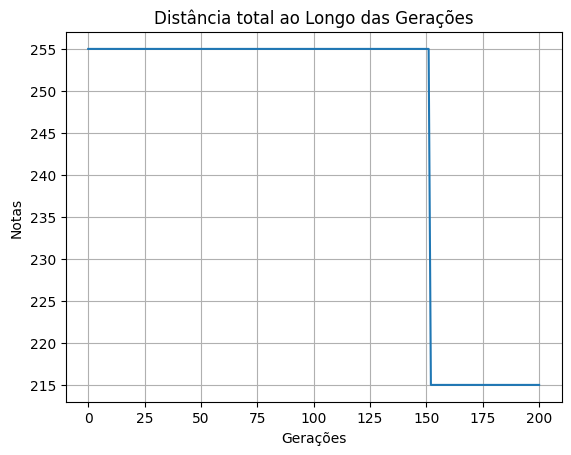

In [1092]:
# Execução do algoritmo
melhores = alg_genetico(200, 30, 64, 0.1, 16)

# Extração dos valores de lucro dos melhores cromossomos
notas = [notas for notas, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(notas)
plt.title('Distância total ao Longo das Gerações')
plt.xlabel('Gerações')
plt.ylabel('Notas')
plt.grid(True)
plt.show()

In [1093]:
minimo = min(melhores)
min_nota = minimo[0]
print(min_nota)
min_crom = minimo[1]
print(min_crom)




215
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]


In [1094]:
# Supondo que variaveis(min_crom, 16) retorna 4 listas de bits
p1, p2, p3, p4 = variaveis(min_crom, 16)

print(p1)
print(p2)
print(p3)
print(p4)



[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
